## I am going to explore Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy

In [2]:
titanic_data=pd.read_csv('titanic-data.csv')

In [3]:
#let's see the available features
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we have Survived,Pclass,Sex,Embarked as catogorical variable, Embarked ordinal, Age continuous, Fare SibSp,Parch Discrete

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Through this data we would like to find the effect of various factors such as age, sex, station of Embarkment,their class and no. of relatives present on survival chances of passangers.our cabin column has lots of null values.so we would not like to modify it much. there is only 2 entries in embarked column having null values,so we will replace it with mode value of point of embarktion.

In [6]:
# let's see some major statistics 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


we see that most of the passangers are male and there are cabins which are shared by passangers and point of maximum embarktion is S.so let's fill missing value in embarked with 'S'. we can fill values in age also but i am skipping that.

In [8]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna('S')

# Let's see  feature corelation

## Correlation_Pclass

In [9]:
titanic_data.groupby('Pclass',as_index=False)['Survived'].mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


there seems to have little corelation among survived and Pclass.Higher class passangers are more likely to survive.

In [10]:
titanic_data.groupby('Sex',as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


that's pretting amazing correlation. females are 4 times more likely to survive

In [11]:
titanic_data.groupby('Embarked',as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [12]:
titanic_data.groupby('SibSp',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Having more sibling can be corelated to less survival rate

In [13]:
titanic_data.groupby('Parch',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
titanic_data['Age_band']=pd.cut(titanic_data['Age'],6)
titanic_data.groupby('Age_band',as_index=False)['Survived'].mean()

,Age_band,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80]",0.142857


children have high chances of survival based on corelation.

{'boxes': [<matplotlib.lines.Line2D at 0xa4cd518>],
 'caps': [<matplotlib.lines.Line2D at 0xa4e9208>,
 'fliers': [<matplotlib.lines.Line2D at 0xa615630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa4e9cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa5a43c8>,
  <matplotlib.lines.Line2D at 0xa4cdc50>]}

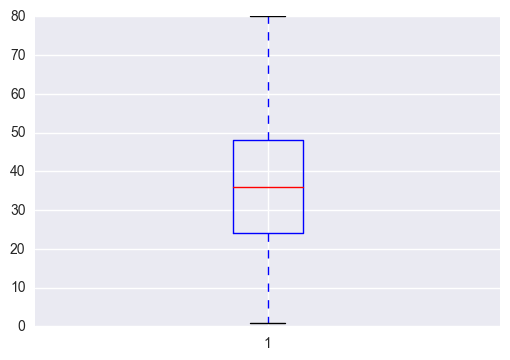

In [15]:
#let's visualize some of data
plt.boxplot(titanic_data.dropna()['Age'].values)


most of our passangers are young people.

## Age histogram based on Pclass,Survived

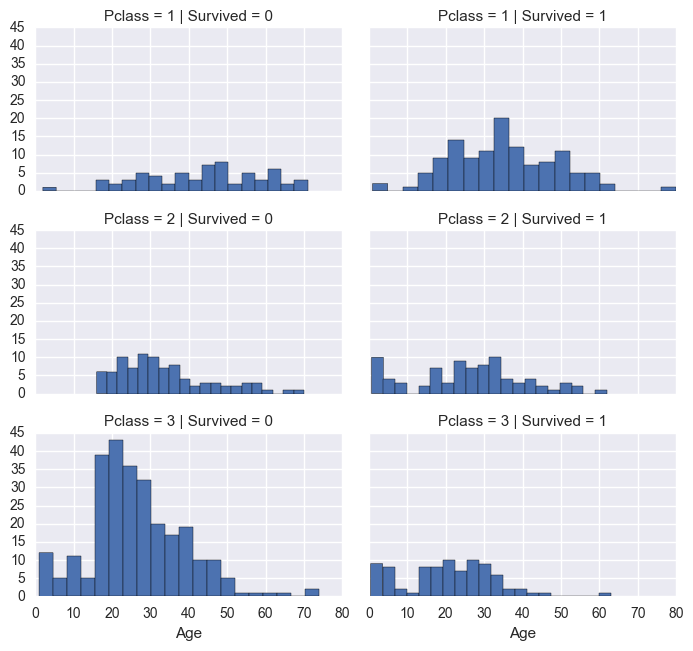

In [16]:
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

we see that more no. of passangers survived in upper classes and also children were almost certain to survive if they belonged to higher classes.

# Age Histogram based on Gender and Survived

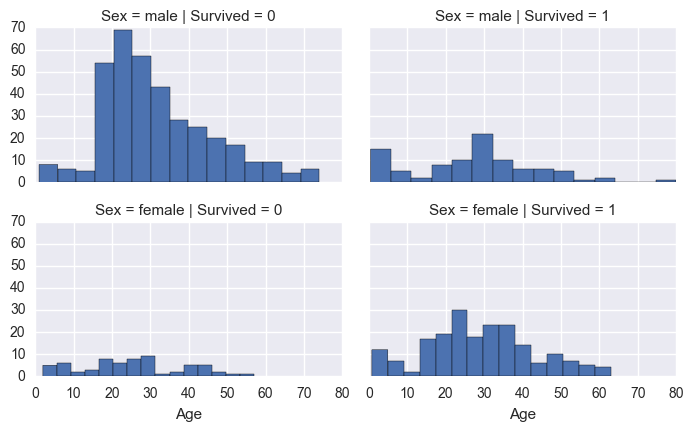

In [17]:
grid = sns.FacetGrid(titanic_data, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=15)

we can clearly see that women had very higher survival rate.

In [18]:
#let's do some t-tests
from scipy.stats import ttest_ind

In [19]:
#divide our data in two groups tp extract data for two conditions
cat1 = titanic_data[titanic_data['Survived']==0]
cat2 = titanic_data[titanic_data['Survived']==1]

We can assume that our Age is normally distributed. so we can apply t-test to it. We re not sure about Fare distribution so we apply non parametric Mann-Whitney rank test.

In [20]:
# t_test on Age
ttest_ind(cat1['Age'].dropna(), cat2['Age'].dropna())
# there is statistically difference in age between those who survived and those who did not

Ttest_indResult(statistic=2.0666869462538102, pvalue=0.039124654013482488)

In [23]:
scipy.stats.mannwhitneyu(x=cat1['Fare'],y=cat2['Fare'])

MannwhitneyuResult(statistic=57806.5, pvalue=2.2767385896251186e-22)

it has very low probability so it's statistically significant.

Most of the columns in our data has no missing values except in cabin and Age. We replaced two missing values in our embarked column by most common occurance. There are 891 entries in our data.These are only corelations.We need to do some more rigoures test. we would like to reduce some dimensionality,we also would like to split our data into training and testing data and apply some prediction algorithem to training set and then test it on our testing data.From that we can make some conclusions.


These are all tentative findings. further exploration is required.Based on the above exploration, i came to following conclusions:-
1. Most of the people on boat were young people.
2. people of higher class(having ticket costs low) were less likely to survive.
3. fare  was a huge factor in determining survival rate as was visible through various plots and t-test.It matches our intution that Higher class people were rescued first.
4. Females were 4 times more likely to survive.it matches our intution that children and female were rescued first.
5. No. of relatives present were also critical in determining survival chances.